#### Import Libraries

In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt 
import seaborn as sns
import regex as re
import numpy as np

In [2]:
# import all necessary dataset 
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
spray = pd.read_csv('./datasets/spray.csv')
weather = pd.read_csv('./datasets/weather.csv')

#### Change Header to Lowercase

In [3]:
# change columns for all dataframes to lowercase for easy reference
for df in [train, test, spray, weather]:
    df.columns = df.columns.str.lower()

#### Check for Null Values

All datasets are complete and has no null values except for the spray dataset. 

In [4]:
# check shape
spray.shape

(14835, 4)

In [5]:
# check null values
spray.isnull().sum()

date           0
time         584
latitude       0
longitude      0
dtype: int64

In [6]:
# fill all null values with blank
spray.fillna("", inplace=True)

The time columns in the spray dataset has a few null values we will replace them with blanks. 

#### Create functions for plotting graphs in EDA

In [7]:
# create a function for subplot histogram
def subplot_barplot(dataframe, list_of_columns, xlabels, ylabels, size):
    nrows = int(np.ceil(len(list_of_columns)/2)) # no. rows to populate 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=size) # plot subplot, state no. of columns, determine figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, create positions for subplots
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].barplot(dataframe[column], color='pink',edgecolor='violet') # feel free to add more settings
        ax[i].set_title(column)   # set graph title
        ax[i].set_xlabel(xlabels) # set x label
        ax[i].set_ylabel(ylabels) # set y label
        ax[i].set_ylim(0,2050) # set y axis to 2050 (representing total rows in dataframe)   
    if len(list_of_columns) % 2 == 1:  # Turn off odd number of subplots            
        ax[-1].axis('off')
    sns.set(font_scale=1)  
    plt.tight_layout() 

In [8]:
# create a function for subplot histogram
def subplot_histplot(dataframe, list_of_columns, xlabels, ylabels, size):
    nrows = int(np.ceil(len(list_of_columns)/2)) # no. rows to populate 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=size) # plot subplot, state no. of columns, determine figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, create positions for subplots
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color='pink',edgecolor='violet') # feel free to add more settings
        ax[i].set_title(column)   # set graph title
        ax[i].set_xlabel(xlabels) # set x label
        ax[i].set_ylabel(ylabels) # set y label
        ax[i].set_ylim(0,2050) # set y axis to 2050 (representing total rows in dataframe)   
    if len(list_of_columns) % 2 == 1:  # Turn off odd number of subplots            
        ax[-1].axis('off')
    sns.set(font_scale=1)  
    plt.tight_layout() 

In [9]:
# create a function for subplot boxplot
def subplot_box(df, list_x_var, y_var,cols,size):
    nrows = int(np.ceil(len(list_x_var)/cols))
    fig, ax = plt.subplots(nrows=nrows, ncols=cols, figsize=size) 
    ax = ax.ravel()
    for i, column_x in enumerate(list_x_var):                  
        sns.boxplot(data=df, x=list_x_var[i], y=y_var , ax=ax[i])       # Plotting scatterplots
        ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)        # Set x ticks labels to a rotation of 90degrees
        ax[i].set_title(f'{y_var} by {list_x_var[i]}', fontsize = 14)           # Set titles
    if len(list_x_var) % cols == 1:                             
        ax[-1].axis('off')
    plt.tight_layout()

In [10]:
# create a function for subplot scatter plot
def subplot_scatter(df, list_of_columns_x, columns_y, xlabels, ylabels):
    nrows = int(np.ceil(len(list_of_columns_x)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 30)) # You'll want to specify your figsize
    ax = ax.ravel()
    for i, column_x in enumerate(list_of_columns_x):                  # Gives us an index and columns            
        sns.scatterplot(data=df,
             x=column_x, 
             y=columns_y,
             ax= ax[i])       # Plotting scatterplots      
        ax[i].set_title(f'Fig {i+1}.: {column_x}', fontsize = 15)           # Set titles     
        ax[i].set_xlabel(xlabels,fontsize = 15)          # Set xlabels   
        ax[i].set_ylabel(ylabels,fontsize = 15)
        ax[i].axvline(x=df[column_x].mean(), ls='--', linewidth=2, c='red')
    if len(list_of_columns_x) % 2 == 1:                             # Turn off odd number of subplots            
        ax[-1].axis('off')
    sns.set(font_scale=1)    # Set scale for plots                  
    plt.tight_layout()         # Move the plots so they don't overlap 

#### EDA: Train Dataset

In [11]:
train.head(3)

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0


In [12]:
train.dtypes

date                       object
address                    object
species                    object
block                       int64
street                     object
trap                       object
addressnumberandstreet     object
latitude                  float64
longitude                 float64
addressaccuracy             int64
nummosquitos                int64
wnvpresent                  int64
dtype: object

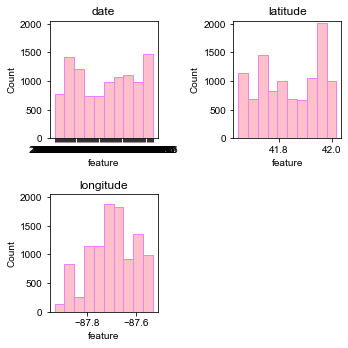

In [13]:
subplot_histplot(train, ['date','latitude','longitude'], 'feature', 'Count', (5,5))

In [14]:
train.describe()

,block,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [15]:
train['wnvpresent'].value_counts()

0    9955
1     551
Name: wnvpresent, dtype: int64

#### EDA: Weather dataset

In [16]:
# set display length for easy viewing
pd.options.display.max_rows=999
pd.options.display.max_columns=999

In [17]:
# view weather dataframe
weather.head(5)

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [18]:
# weather data types per columns
weather.dtypes

station          int64
date            object
tmax             int64
tmin             int64
tavg            object
depart          object
dewpoint         int64
wetbulb         object
heat            object
cool            object
sunrise         object
sunset          object
codesum         object
depth           object
water1          object
snowfall        object
preciptotal     object
stnpressure     object
sealevel        object
resultspeed    float64
resultdir        int64
avgspeed        object
dtype: object

There are many numerical columns that are categorized as object, we will dive deeper into the dataset to understand why this is so.

In [19]:
#  check columns with mismatched data type unique values
weather['water1'].value_counts()

M    2944
Name: water1, dtype: int64

In [20]:
#  check columns with mismatched data type unique values
weather['snowfall'].value_counts()

M      1472
0.0    1459
  T      12
0.1       1
Name: snowfall, dtype: int64

In [21]:
#  check columns with mismatched data type unique values
weather['sunset'].value_counts().head(2)

-       1472
1931      96
Name: sunset, dtype: int64

After looking at columns whose datatype since to be mismatched,  we notice that there are 'M', 'T', '-' values in the dataset.   

- 'M' indicates missing data, as such we will be replacing 'M' with nan, a special number used to represent a nonexistent result. We will also be removing columns which are fully populated with 'M' (missing data).

- 'T' indicates Trace precipitation amount
- '-' indicates values not available for sunrise/sunset.

In [22]:
# non-numeric values in dataset
check_cols = weather[(weather=='M')|(weather=='  T')|(weather=='-')]

In [23]:
check_cols

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,-,-,NaN,M,M,M,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,-,-,NaN,M,M,M,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,-,-,NaN,M,M,M,NaN,NaN,NaN,NaN,NaN,NaN
2940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2941,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,-,-,NaN,M,M,M,T,NaN,NaN,NaN,NaN,NaN
2942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
gfdagfd

NameError: name 'gfdagfd' is not defined

In [ ]:
check_cols.columns

In [ ]:
for col_names in check_cols.columns:
    print(check_cols[col_names].value_counts())

In [ ]:
# drop water1 as it is empty
weather.drop('water1', axis=1, inplace=True)

In [ ]:
# drop water1 as it is empty
weather.drop('water1', axis=1, inplace=True)

In [ ]:
# replace 'M' with numpy nan
 

In [ ]:
# get dataframe shape 
weather.shape

In [ ]:
# check for null values in weather
weather.isnull().sum()

In [ ]:
weather.dtypes

In [ ]:
weather.columns

In [ ]:
# convert object to float
for v in ['tavg', 'depart','wetbulb', 'heat', 'cool', 
          'depth','snowfall', 'stnpressure', 
          'sealevel', 'avgspeed']:
    pd.to_numeric(weather[v])

#### EDA: Weather; split CodeSum to Weather Types

In [ ]:
# get unique values in codesum
weather_types = weather['codesum'].unique()

# show unique weather types
all_weather_types = []
for i in weather_types:
    weather_code = re.findall(r'\w{2}\+*', i)
    all_weather_types += weather_code
    
# get unique weather code 
unique_weather_types = set(all_weather_types)
unique_weather_types

split weather into 14 columns and return binary results

In [ ]:
# create columns for unique_weather_types
for v in unique_weather_types:
    for codes in weather ['codesum']:
        weather[f'weathertype_{v}'] = (1 if  re.search(v,codes) is not None else 0)

#### EDA: date

In [ ]:
for df in [train, test, spray, weather]:
    df[['year', 'month', 'day']] = pd.DataFrame([ x.split('-') for x in df['date'].tolist() ])

In [ ]:
weather

In [ ]:
pd.options.display.max_rows=999

In [ ]:
weather

In [ ]:
weather.groupby('station').describe().T

In [ ]:
spray.head(3)

In [ ]:
spray['date'].value_counts()

In [ ]:
test['date'].value_counts()